<a href="https://colab.research.google.com/github/rakshitha-sathyakumar/twitter-COVID-19-analysis/blob/master/sentiment-analysis/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [68]:
df = pd.read_csv("/content/drive/My Drive/256 project/Data/preprocessed_data.csv")

In [69]:
df

,Unnamed: 0,created_at,tweet_id,text,iso_language_code,result_type,source,user_id,user_name,user_location,users_followers_count,statuses_count,retweeted_text,retweet_count,hashtags,favorite_count,retweeted_status,url,clean_text
0,0,2020-07-10 05:49:12,1.281465e+18,How Can Accounting Software Reduce the Impact ...,en,recent,Twitter Web App,7.429997e+17,📚RayvatAccounting.com,United States,1773.0,9613.0,How Can Accounting Software Reduce the Impact ...,0.0,Coronavirus,0.0,This is a retweet,This is a retweet,accounting software reduce impact coronavirus ...
1,1,2020-07-10 05:49:29,1.281466e+18,What people know and how they behave during CO...,en,recent,News Medical,3.921104e+07,News Medical,None,13293.0,54866.0,What people know and how they behave during CO...,0.0,Canada,1.0,This is a retweet,This is a retweet,people know behave covid19 canadian perspectiv...
2,2,2020-07-10 05:58:18,1.281468e+18,RT @Poorvika_Mobile: A silver lining amidst th...,en,recent,Twitter for Android,1.250720e+18,Subi,None,2.0,317.0,RT @Poorvika_Mobile: A silver lining amidst th...,932.0,"Poorvika_Mobiles, India",0.0,This is a retweet,This is a retweet,rt silver lining amidst chaoswe poorvikamobil...
3,3,2020-07-10 05:58:56,1.281468e+18,RT @gergerlioglueng: Harun Çümen (Balıkesir Pr...,en,recent,Twitter for Android,1.242201e+18,Gurbet,None,623.0,2722.0,RT @gergerlioglueng: Harun Çümen (Balıkesir Pr...,157.0,COVID19,0.0,This is a retweet,This is a retweet,rt harun cumen balikesir prison couldnt see k...
4,4,2020-07-10 06:00:00,1.281468e+18,Oximeters won't steal your fingerprints. Turni...,en,recent,TweetDeck,3.780315e+09,International Fact-Checking Network,🌎 🌍 🌏,27111.0,11456.0,Oximeters won't steal your fingerprints. Turni...,6.0,None,6.0,This is a retweet,This is a retweet,oximeters wont steal fingerprints turning tech...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29143,29140,2020-08-04 05:35:53,1.290522e+18,RT @CDWGWAGov: Emerging Technologies for Track...,en,recent,Twitter for addempsea,1.196874e+18,quotesBot,None,907.0,136081.0,RT @CDWGWAGov: Emerging Technologies for Track...,11.0,"pandemic, bigdata, datascience, analytics, ai,...",0.0,This is a retweet,This is a retweet,rt emerging technologies tracking covid19 pan...
29144,29141,2020-08-04 05:35:58,1.290522e+18,RT @CDWGWAGov: Emerging Technologies for Track...,en,recent,nlognrobot,1.260063e+18,#100DaysOfCode,None,1435.0,187553.0,RT @CDWGWAGov: Emerging Technologies for Track...,11.0,"pandemic, bigdata, datascience, analytics, ai,...",0.0,This is a retweet,This is a retweet,rt emerging technologies tracking covid19 pan...
29145,29142,2020-08-04 05:36:34,1.290522e+18,RT @CDWGWAGov: Emerging Technologies for Track...,en,recent,TheDataScienceBot,1.276058e+18,The Data Science Bot,None,588.0,57258.0,RT @CDWGWAGov: Emerging Technologies for Track...,11.0,"pandemic, bigdata, datascience, analytics, ai,...",0.0,This is a retweet,This is a retweet,rt emerging technologies tracking covid19 pan...
29146,29143,2020-08-04 05:37:44,1.290522e+18,Wow! Spain &amp; France don’t have any new dai...,en,recent,Twitter for iPhone,3.242523e+09,Stray Turtle,"California, USA",74.0,60615.0,Wow! Spain &amp; France don’t have any new dai...,0.0,None,0.0,This is a retweet,This is a retweet,wow spain amp france dont new daily cases that...


In [70]:
to_drop =['created_at', 'Unnamed: 0','tweet_id', 'text', 'iso_language_code', 'result_type', 'source', 'user_id', 'user_name', 'user_location', 'users_followers_count', 'statuses_count', 'retweeted_text', 'retweet_count', 'hashtags', 'favorite_count', 'retweeted_status', 'url' ]
df = df.drop(to_drop, axis=1)

In [71]:
df.head()

,clean_text
0,accounting software reduce impact coronavirus ...
1,people know behave covid19 canadian perspectiv...
2,rt silver lining amidst chaoswe poorvikamobil...
3,rt harun cumen balikesir prison couldnt see k...
4,oximeters wont steal fingerprints turning tech...


# **Method 1: TextBlob**

In [72]:
df_textblob = df

In [73]:
df_textblob

,clean_text
0,accounting software reduce impact coronavirus ...
1,people know behave covid19 canadian perspectiv...
2,rt silver lining amidst chaoswe poorvikamobil...
3,rt harun cumen balikesir prison couldnt see k...
4,oximeters wont steal fingerprints turning tech...
...,...
29143,rt emerging technologies tracking covid19 pan...
29144,rt emerging technologies tracking covid19 pan...
29145,rt emerging technologies tracking covid19 pan...
29146,wow spain amp france dont new daily cases that...


In [74]:
df_textblob["clean_text"]= df_textblob["clean_text"].astype(str)

In [75]:
df_textblob

,clean_text
0,accounting software reduce impact coronavirus ...
1,people know behave covid19 canadian perspectiv...
2,rt silver lining amidst chaoswe poorvikamobil...
3,rt harun cumen balikesir prison couldnt see k...
4,oximeters wont steal fingerprints turning tech...
...,...
29143,rt emerging technologies tracking covid19 pan...
29144,rt emerging technologies tracking covid19 pan...
29145,rt emerging technologies tracking covid19 pan...
29146,wow spain amp france dont new daily cases that...


In [76]:
def get_Subjectivity(text):
  subjectivity = TextBlob(text).sentiment.subjectivity
  return subjectivity

In [77]:
def get_Polarity(text):
  polarity = TextBlob(text).sentiment.polarity
  return polarity

In [78]:
df_textblob['Subjectivity'] = df_textblob['clean_text'].apply(get_Subjectivity)
df_textblob['Polarity'] = df_textblob['clean_text'].apply(get_Polarity)

In [79]:
df_textblob

,clean_text,Subjectivity,Polarity
0,accounting software reduce impact coronavirus ...,0.400000,-0.250000
1,people know behave covid19 canadian perspectiv...,0.000000,0.000000
2,rt silver lining amidst chaoswe poorvikamobil...,0.516667,-0.075000
3,rt harun cumen balikesir prison couldnt see k...,0.000000,0.000000
4,oximeters wont steal fingerprints turning tech...,0.400000,0.200000
...,...,...,...
29143,rt emerging technologies tracking covid19 pan...,0.000000,0.000000
29144,rt emerging technologies tracking covid19 pan...,0.000000,0.000000
29145,rt emerging technologies tracking covid19 pan...,0.000000,0.000000
29146,wow spain amp france dont new daily cases that...,0.640909,0.307273


In [80]:
def get_Analysis(polarity):
  if polarity > 0:
    return 'Positive'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Negative'

In [81]:
df_textblob['Analysis'] = df_textblob['Polarity'].apply(get_Analysis)

In [82]:
df_textblob

,clean_text,Subjectivity,Polarity,Analysis
0,accounting software reduce impact coronavirus ...,0.400000,-0.250000,Negative
1,people know behave covid19 canadian perspectiv...,0.000000,0.000000,Neutral
2,rt silver lining amidst chaoswe poorvikamobil...,0.516667,-0.075000,Negative
3,rt harun cumen balikesir prison couldnt see k...,0.000000,0.000000,Neutral
4,oximeters wont steal fingerprints turning tech...,0.400000,0.200000,Positive
...,...,...,...,...
29143,rt emerging technologies tracking covid19 pan...,0.000000,0.000000,Neutral
29144,rt emerging technologies tracking covid19 pan...,0.000000,0.000000,Neutral
29145,rt emerging technologies tracking covid19 pan...,0.000000,0.000000,Neutral
29146,wow spain amp france dont new daily cases that...,0.640909,0.307273,Positive


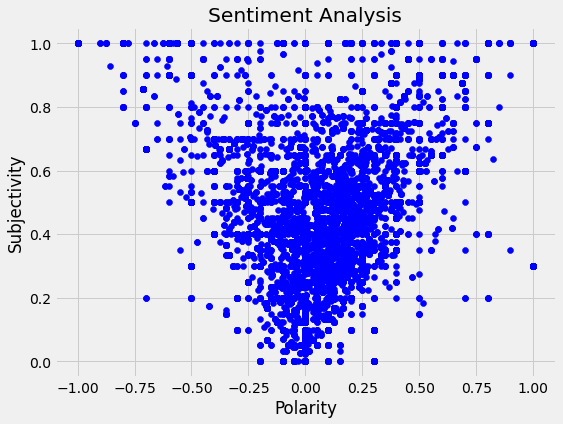

In [ ]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df_textblob["Polarity"][i], df_textblob["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
# Print the percentage of positive tweets
ptweets = df_textblob[df_textblob.Analysis == 'Positive']
ptweets = ptweets['clean_text']
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

32.3

In [ ]:
# Print the percentage of negative tweets
ntweets = df_textblob[df_textblob.Analysis == 'Negative']
ntweets = ntweets['clean_text']
round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

18.4

In [ ]:
# Print the percentage of neutral tweets
ptweets = df_textblob[df_textblob.Analysis == 'Neutral']
ptweets = ptweets['clean_text']
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

49.3

In [ ]:
df_textblob['Analysis'].value_counts()

Neutral     14356
Positive     9425
Negative     5367
Name: Analysis, dtype: int64

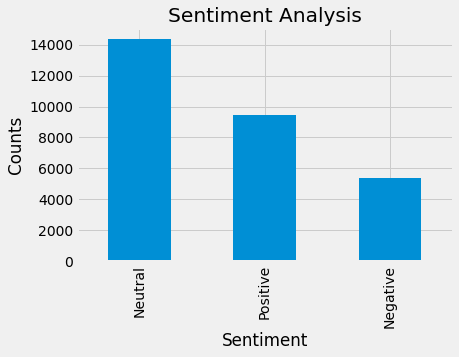

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_textblob['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

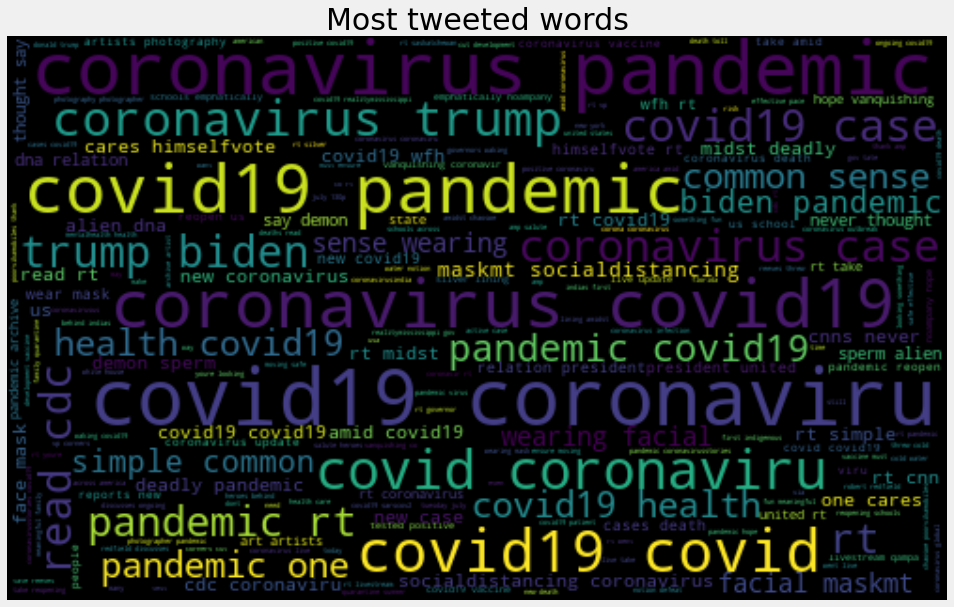

In [ ]:
allWords = ' '.join([twts for twts in df_textblob['clean_text']])
wordCloud = WordCloud(width=500, height=300, random_state=21).generate(allWords)

plt.figure(figsize=(15, 15))
plt.title('Most tweeted words', fontsize = 30)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Method 2:** **Vader Analysis**

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.7MB/s 


In [ ]:
import nltk
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df

,clean_text,Subjectivity,Polarity,Analysis
0,accounting software reduce impact coronavirus ...,0.400000,-0.250000,Negative
1,people know behave covid19 canadian perspectiv...,0.000000,0.000000,Neutral
2,rt silver lining amidst chaoswe poorvikamobil...,0.516667,-0.075000,Negative
3,rt harun cumen balikesir prison couldnt see k...,0.000000,0.000000,Neutral
4,oximeters wont steal fingerprints turning tech...,0.400000,0.200000,Positive
...,...,...,...,...
29143,rt emerging technologies tracking covid19 pan...,0.000000,0.000000,Neutral
29144,rt emerging technologies tracking covid19 pan...,0.000000,0.000000,Neutral
29145,rt emerging technologies tracking covid19 pan...,0.000000,0.000000,Neutral
29146,wow spain amp france dont new daily cases that...,0.640909,0.307273,Positive


In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df_vader = df

In [ ]:
df_vader.head()

,clean_text,Subjectivity,Polarity,Analysis
0,accounting software reduce impact coronavirus ...,0.400000,-0.250,Negative
1,people know behave covid19 canadian perspectiv...,0.000000,0.000,Neutral
2,rt silver lining amidst chaoswe poorvikamobil...,0.516667,-0.075,Negative
3,rt harun cumen balikesir prison couldnt see k...,0.000000,0.000,Neutral
4,oximeters wont steal fingerprints turning tech...,0.400000,0.200,Positive


In [ ]:
to_drop = ['Subjectivity', 'Polarity', 'Analysis']
df_vader=df_vader.drop(to_drop, axis = 1)

In [ ]:
df_vader.head()

,clean_text
0,accounting software reduce impact coronavirus ...
1,people know behave covid19 canadian perspectiv...
2,rt silver lining amidst chaoswe poorvikamobil...
3,rt harun cumen balikesir prison couldnt see k...
4,oximeters wont steal fingerprints turning tech...


In [ ]:
scores = []

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(df_vader['clean_text'].shape[0]):
  compound = analyzer.polarity_scores(df_vader['clean_text'][i])["compound"]
  pos = analyzer.polarity_scores(df_vader['clean_text'][i])["pos"]
  neu = analyzer.polarity_scores(df_vader['clean_text'][i])["neu"]
  neg = analyzer.polarity_scores(df_vader['clean_text'][i])["neg"]
  scores.append({"Compound": compound,
                 "Positive": pos,
                 "Negative": neg,
                 "Neutral": neu
                })

In [ ]:
sentiments_score = pd.DataFrame.from_dict(scores)

In [ ]:
df_vader = df_vader.join(sentiments_score)
df_vader.head()

,clean_text,Compound,Positive,Negative,Neutral
0,accounting software reduce impact coronavirus ...,0.0000,0.000,0.000,1.000
1,people know behave covid19 canadian perspectiv...,0.0000,0.000,0.000,1.000
2,rt silver lining amidst chaoswe poorvikamobil...,0.7003,0.326,0.000,0.674
3,rt harun cumen balikesir prison couldnt see k...,-0.5106,0.000,0.171,0.829
4,oximeters wont steal fingerprints turning tech...,0.7669,0.424,0.000,0.576


In [ ]:
def get_Analysis(polarity):
  if polarity > 0:
    return 'Positive'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Negative'

In [ ]:
df_vader['Analysis'] = df_vader['Compound'].apply(get_Analysis)

In [ ]:
df_vader.head()

,clean_text,Compound,Positive,Negative,Neutral,Analysis
0,accounting software reduce impact coronavirus ...,0.0000,0.000,0.000,1.000,Neutral
1,people know behave covid19 canadian perspectiv...,0.0000,0.000,0.000,1.000,Neutral
2,rt silver lining amidst chaoswe poorvikamobil...,0.7003,0.326,0.000,0.674,Positive
3,rt harun cumen balikesir prison couldnt see k...,-0.5106,0.000,0.171,0.829,Negative
4,oximeters wont steal fingerprints turning tech...,0.7669,0.424,0.000,0.576,Positive


In [ ]:
ptweets = df_vader[df_vader.Analysis == 'Positive']
ptweets = ptweets['clean_text']
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

35.2

In [ ]:
ptweets = df_vader[df_vader.Analysis == 'Neutral']
ptweets = ptweets['clean_text']
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

41.0

In [ ]:
ptweets = df_vader[df_vader.Analysis == 'Negative']
ptweets = ptweets['clean_text']
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

23.8

In [ ]:
df_vader['Analysis'].value_counts()

Neutral     11958
Positive    10264
Negative     6926
Name: Analysis, dtype: int64

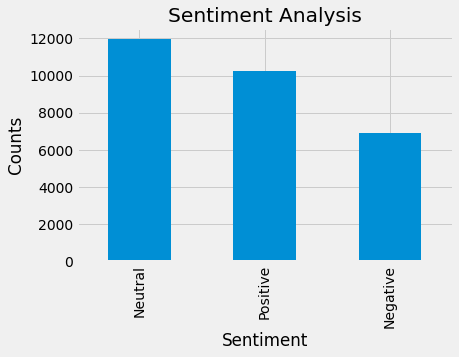

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_vader['Analysis'].value_counts().plot(kind = 'bar')
plt.show()